In [1]:
#Curve Fitting Programming of Linear Regression

In [2]:
# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
import numpy as np

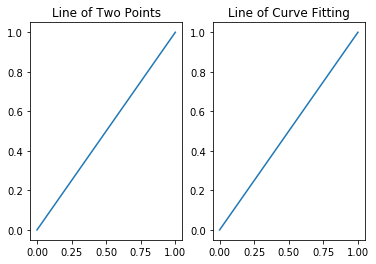

In [3]:
plt.figure(0)
# Two points decide a line
x = np.array([0.0, 1.0])
y = np.array([0.0, 1.0])
plt.subplot(121)
plt.plot(x,y) #pylab.plot(x, y)
plt.title('Line of Two Points')
# x = np.linspace(0, 1, 100)  # 100 evenly-spaced values from 0 to 5
x = np.linspace(0, 1, 100)
y=x
coefs = np.polyfit(x, y, 1)
# p is a polynomial fuction
p = np.poly1d(coefs)
plt.subplot(122)
plt.plot(x, p(x))
plt.title('Line of Curve Fitting')
plt.show()

C:\Users\tccnchsucyut\AppData\Local\conda\conda\envs\testkeras_tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


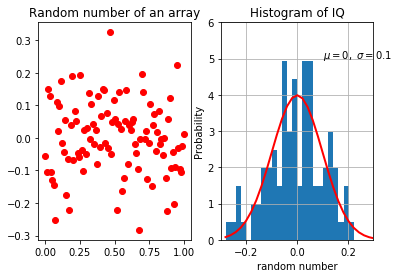

In [4]:
#random number generator Gaussian distribution
#where mu is the mean and sigma the standard deviation. The square of the standard deviation, sigma^2, is called the variance.

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x = np.linspace(0, 1, 100)
plt.figure(1)
plt.subplot(121)
plt.plot(x, s, 'ro')
plt.title('Random number of an array')
#numpy.random.normal https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
#random number generator Gaussian distribution
plt.subplot(122)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.xlabel('random number')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(0.1, 5, r'$\mu=0,\ \sigma=0.1$')
plt.axis([-0.3, 0.3, 0, 6])
plt.grid(True)
plt.show()

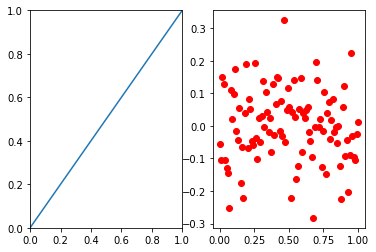

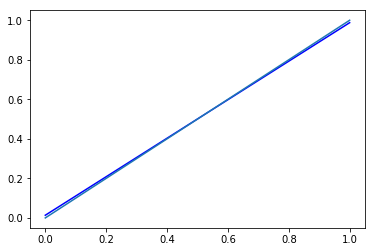

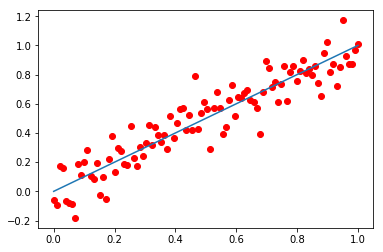

In [5]:
plt.figure(2)
plt.subplot(121)
plt.plot(x, p(x))
plt.axis([0, 1, 0, 1])
#plt.show()
plt.subplot(122)
plt.plot(x, s, 'ro')
plt.show()

linearplusnoise=p(x)+s
coefs = np.polyfit(x, linearplusnoise, 1)
plt.show()


##############################################################
# An Introduction to Programming in Python and Discrete Mathematics 1st Edition
# http://tccnchsu.blogspot.tw/p/blog-page_32.html
# Do not forget colon and space
##############################################################
"""
plt.figure(3)
#Step 1
def linearregression(x):
    mf=1
    bf=0
    y=mf*x+bf
    return y
yh=linearregression(x)
plt.plot(x, yh, 'ro', x,p(x))
"""
##############################################################
# numpy.dot https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
# numpy.mean https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
# step 2
plt.figure(3)
def linearregression(x,input_y):
    n=len(x)
    mf=(np.dot(x,input_y)/n-np.mean(x)*np.mean(input_y))/(np.mean(np.power(x,2))- np.power(np.mean(x), 2))
    bf=np.mean(input_y)-mf*np.mean(x)
    yp=mf*x+bf
    return yp
yh=linearregression(x,linearplusnoise)
plt.plot(x, yh, 'blue', x,p(x))


##############################################################

plt.figure(4)



# plot the ression line
plt.plot(x, linearplusnoise, 'ro', x,p(x))
plt.show()

In [6]:
#Please write your code with formula of close form of slope m and intercept to plot a line
# slope m=

In [7]:
#Programming of Linear Regression with Tensorflow
#sherrym (Sherry Moore) · GitHub https://github.com/sherrym/tf-tutorial
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf

C:\Users\tccnchsucyut\AppData\Local\conda\conda\envs\testkeras_tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


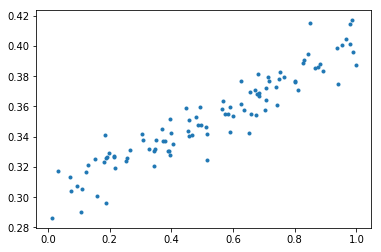

In [8]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_data, y_data, '.')
# Save datas to a file DATA_FILE = "data/fire_theft.xls"
#DATA_FILE = "data/fire_theft.xls"
import xlwt
book = xlwt.Workbook(encoding="utf-8")
book = xlwt.Workbook('C:/Users/tccnchsucyut/data/fire_theft1.xls')
sheet1 = book.add_sheet("Sheet 1")
sheet1.write(0, 0, 0)
#sheet1.write(0, 1, 0)
#sheet1.write(1, 0, 0)
#sheet1.write(1, 1, 0)
#sheet1.write(2, 0, 1)
#sheet1.write(2, 1, 1)
book.save("C:/Users/tccnchsucyut/data/fire_theft1.xls")

In [9]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Uncomment the following lines to see W and b are.
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


In [10]:
# 1.4 Build training graph.
loss = tf.reduce_mean(tf.square(y - y_data))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
# print("loss:", loss)
# print("optimizer:", optimizer)
# print("train:", train)
print(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
name: "init"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"



In [11]:
# 1.5 Uncomment the following line to see what we have built.
print(tf.get_default_graph().as_graph_def())

node {
  name: "random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "random_uniform/max"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "random_uniform/RandomUniform"
  op: "RandomUniform"
  input: "random_uniform/shape"
  attr {
    key: "T"
    value {
    

In [12]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
# print(sess.run([W, b]))

In [13]:
# 1.7 Perform training.
for step in range(201):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    # if step % 20 == 0:
    #    print(step, sess.run([W, b]))

print(sess.run([W, b]))

[array([0.10122751], dtype=float32), array([0.29936275], dtype=float32)]


(0, 1.0)

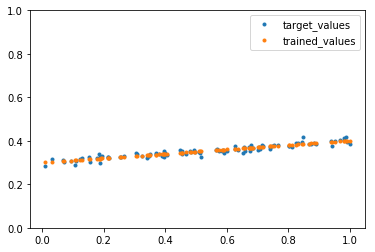

In [14]:
# 1.8 Uncomment the following lines to compare.
pylab.plot(x_data, y_data, '.', label="target_values")
#pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)

In [15]:
#Ref: Lecture note 3: Linear and Logistic Regression in TensorFlow
#https://web.stanford.edu/class/cs20si/2017/lectures/notes_03.pdf

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

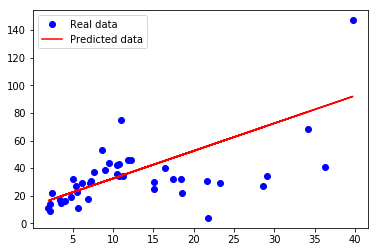

In [16]:
"""
tf-oreilly-master
https://github.com/chiphuyen/tf-oreilly
Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
"""
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

DATA_FILE = 'data/fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(50): # train the model 100 epochs
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

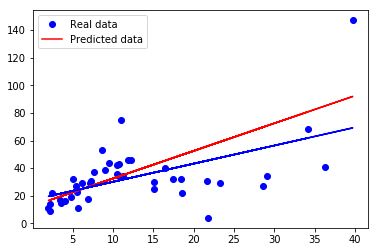

In [20]:
#Please write your code with formula of close form of slope m and intercept to plot a line
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
yh=linearregression(X,Y)
plt.plot(X, yh, 'blue')
plt.legend()
plt.show()